In [1]:
import struct_post.postanalysis as pa
from dataclasses import dataclass

In [ ]:
@dataclass # this thing is called a "decorator"
class SampleDetails:
    """
    Doc string
    """
    sample_name: str
    width: float
    thickness: float
    sample_file_name: str

@dataclass # this thing is called a "decorator"
class SampleAnalysisResults:
    """
    Doc string
    """
    sample_name: str
    modulus_of_elasticity: float
    ultimate_tensile_strength: float
    yield_Strength: float

In [2]:
Coupon_details = pa.sample_data_read('Sample Data.xlsx')

In [11]:
def batch_analysis(Coupon_details: str, savefig: bool = False):
    """
    Perform batch analysis on a list of samples and return the results.

    Parameters
    ----------
    Coupon_details : list
        A list of SampleDetails objects, each containing:
        - sample_file_name : Name of the sample file
        - thickness        : Sample thickness
        - width            : Sample width
    savefig : bool, optional
        Whether to save the figures generated during analysis. Default is False.

    Returns
    -------
    list
        A list of SampleAnalysisResults objects, each containing:
        - modulus_of_elasticity       : Elastic modulus (E_GPa)
        - ultimate_tensile_strength   : Ultimate tensile strength (UTS_MPa)
        - yield_Strength              : Yield strength (Yield_Strength_MPa)
    """
    SARS = []
    for Coupon_detail in Coupon_details:
        result = pa.coupon_test_analysis(Coupon_detail.sample_file_name, Coupon_detail.thickness, Coupon_detail.width, savefig)
        SAR = SampleAnalysisResults(result[0], result[2]['E_GPa'], result[2]['UTS_MPa'], result[2]['Yield_Strength_MPa'])
        SARS.append(SAR)
    return SARS

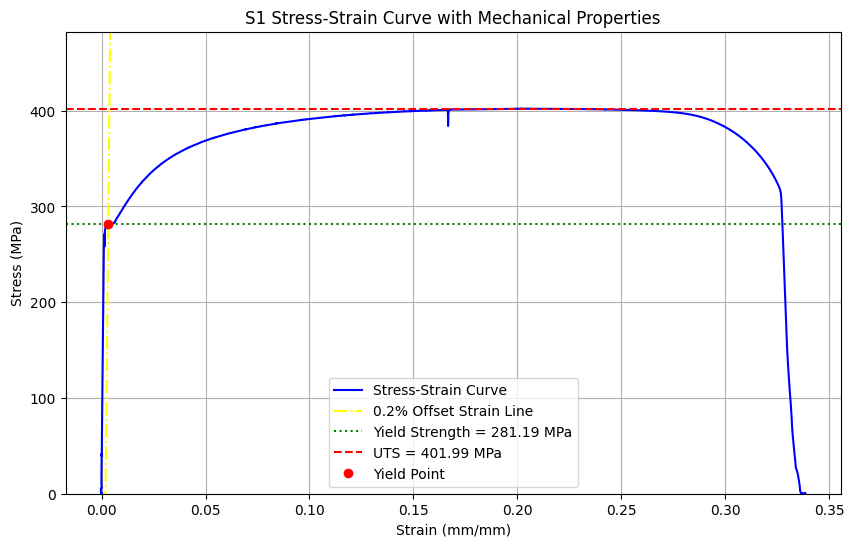

Young's Modulus (E): 219.53 GPa
Ultimate Tensile Strength (UTS): 401.99 MPa
Yield Strength: 281.19 MPa


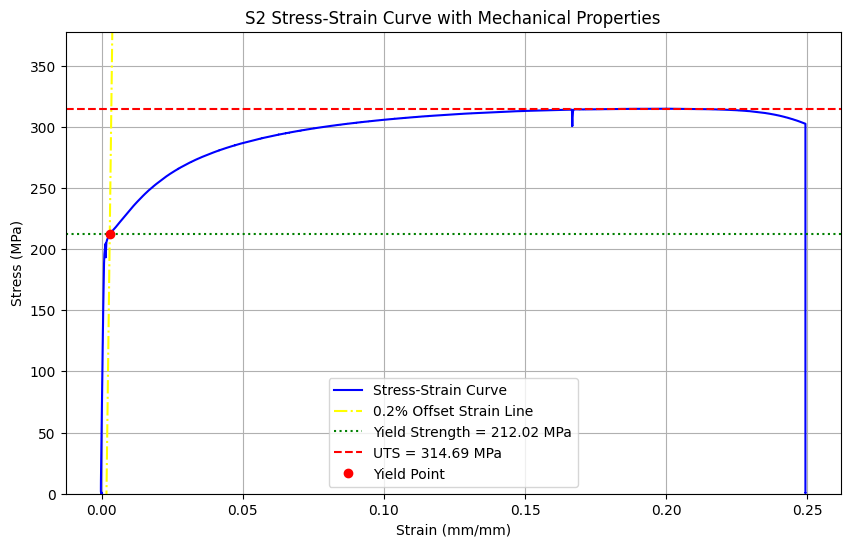

Young's Modulus (E): 183.32 GPa
Ultimate Tensile Strength (UTS): 314.69 MPa
Yield Strength: 212.02 MPa


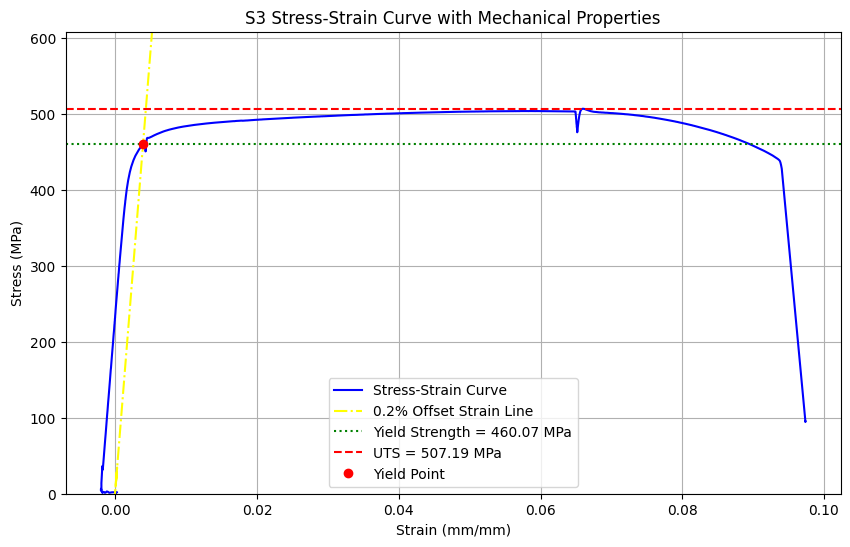

Young's Modulus (E): 116.48 GPa
Ultimate Tensile Strength (UTS): 507.19 MPa
Yield Strength: 460.07 MPa


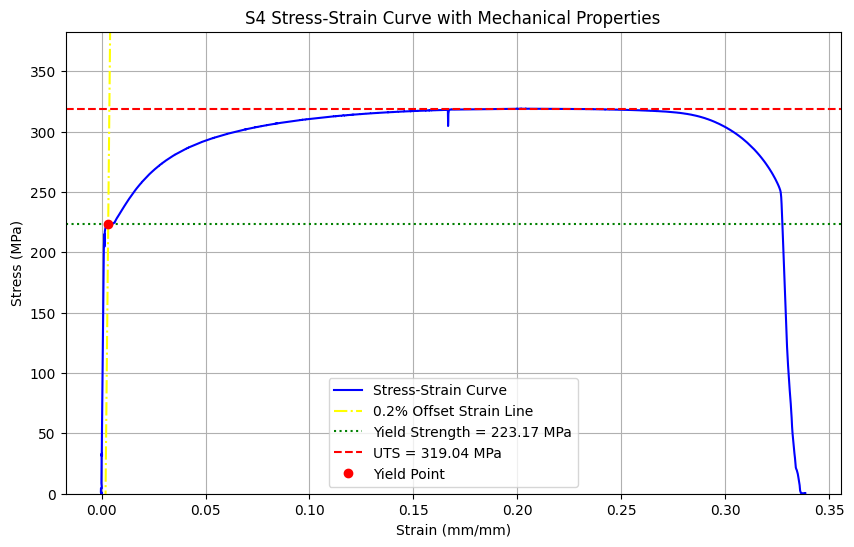

Young's Modulus (E): 174.23 GPa
Ultimate Tensile Strength (UTS): 319.04 MPa
Yield Strength: 223.17 MPa


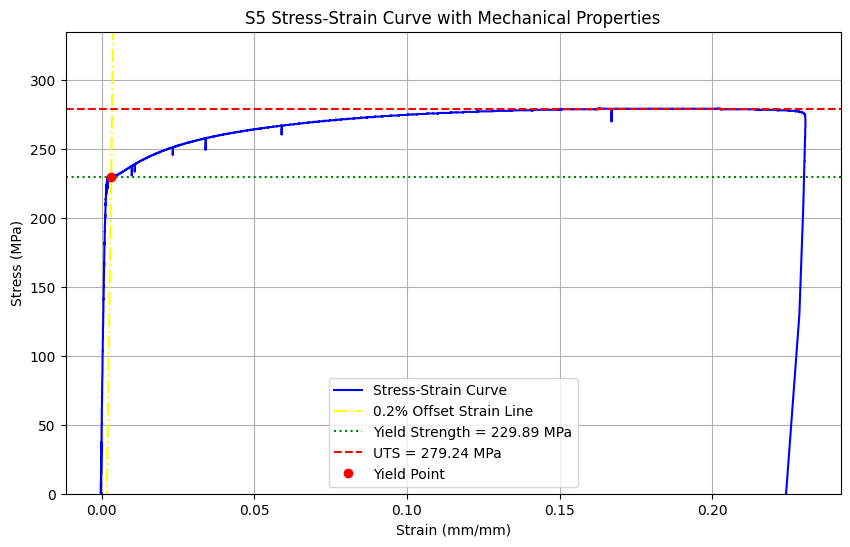

Young's Modulus (E): 160.87 GPa
Ultimate Tensile Strength (UTS): 279.24 MPa
Yield Strength: 229.89 MPa


In [3]:
R = pa.batch_analysis(Coupon_details,True)

In [6]:
R

[SampleAnalysisResults(sample_name='S1', modulus_of_elasticity=np.float64(219.5329298272338), ultimate_tensile_strength=np.float64(401.98968479999996), yield_Strength=np.float64(281.1899679365556)),
 SampleAnalysisResults(sample_name='S2', modulus_of_elasticity=np.float64(183.31936164269823), ultimate_tensile_strength=np.float64(314.68739115323854), yield_Strength=np.float64(212.02444792508317)),
 SampleAnalysisResults(sample_name='S3', modulus_of_elasticity=np.float64(116.48144457700757), ultimate_tensile_strength=np.float64(507.1875170625), yield_Strength=np.float64(460.0694249789463))]

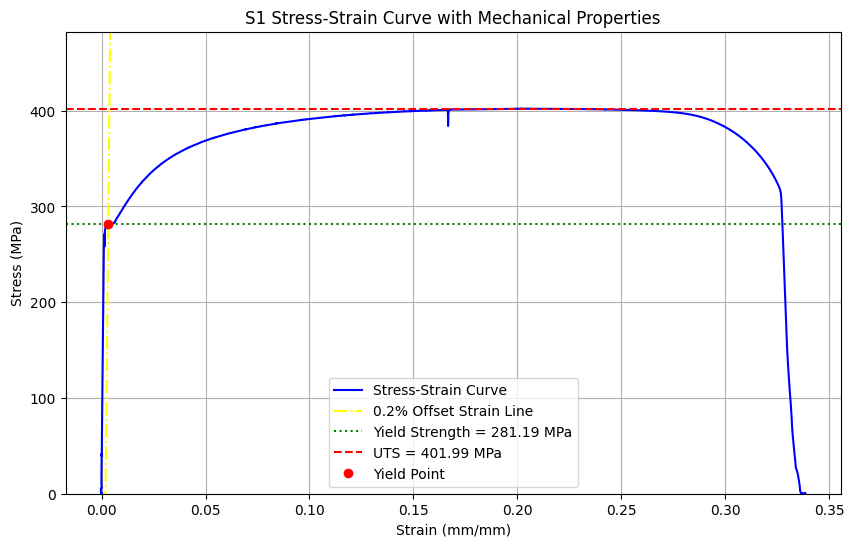

Young's Modulus (E): 219.53 GPa
Ultimate Tensile Strength (UTS): 401.99 MPa
Yield Strength: 281.19 MPa


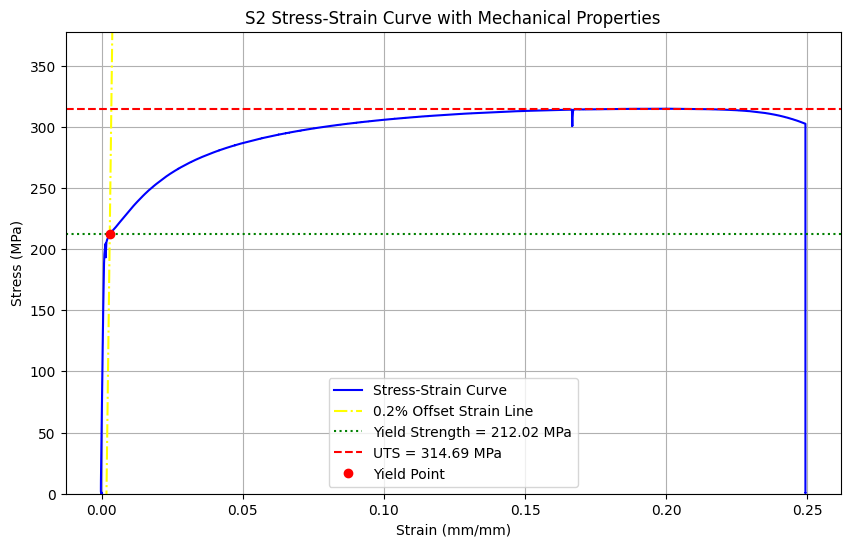

Young's Modulus (E): 183.32 GPa
Ultimate Tensile Strength (UTS): 314.69 MPa
Yield Strength: 212.02 MPa


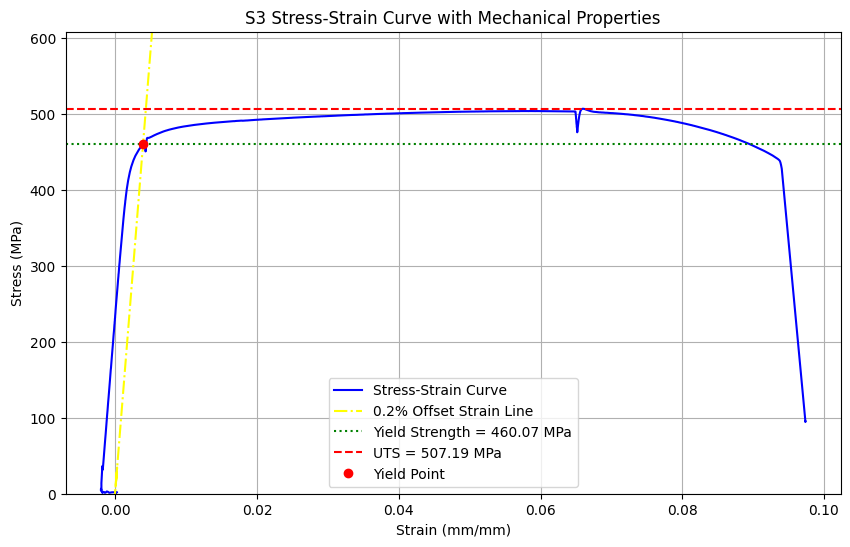

Young's Modulus (E): 116.48 GPa
Ultimate Tensile Strength (UTS): 507.19 MPa
Yield Strength: 460.07 MPa


In [10]:
SARS = []
for Coupon_detail in Coupon_details:
    result = pa.coupon_test_analysis(Coupon_detail.sample_file_name, Coupon_detail.thickness, Coupon_detail.width)
    SAR = SampleAnalysisResults(result[0], result[2]['E_GPa'], result[2]['UTS_MPa'], result[2]['Yield_Strength_MPa'])
    SARS.append(SAR)

In [18]:
def results_save (file_name: str, analysis_results: list):
    from openpyxl import load_workbook
    
    wb = load_workbook(file_name)
    ws = wb.worksheets[0]
    
    for row_idx, row in enumerate(ws.iter_rows(min_row=2, max_col=ws.max_column), start=2):
        excel_sample_name = row[0].value 
        for analysis_result in analysis_results:
            if analysis_result.sample_name == excel_sample_name:
                values_to_write = [
                    analysis_result.modulus_of_elasticity,
                    analysis_result.ultimate_tensile_strength,
                    analysis_result.yield_Strength
                ]
                for col_idx, value in enumerate(values_to_write, start=4):  # 从 D 列开始
                    ws.cell(row=row_idx, column=col_idx, value=float(value))
                break  
    
    wb.save(file_name)
    print('Complete')

In [5]:
pa.results_save('Sample Data.xlsx', R)

Complete


In [6]:
E_GPa = 500

In [7]:
print(f"Young's Modulus (E): {E_GPa:.2f} GPa")

Young's Modulus (E): 500.00 GPa


In [8]:
file_name = 'S1'

In [10]:
print(f"Sample {file_name} Young's Modulus (E): {E_GPa:.2f} GPa")

Sample S1 Young's Modulus (E): 500.00 GPa
